## Observations and Insights 

In [ ]:
#Give me coffee or give me death. Ok Insights we got this
#The sample sizes per drug regimen for this study are not large, with 23 mice for the Capomulin drug being the largest. Larger sample sizes could provide greater insights 
#the linear regression model does not account for possible curvature in the datasets, a linear regression model might not be the best means of analysing this dataset
# for the case of mouse b128, the model clearly described tumor volume decreasing over time, however a singular mouse is not enough data to derive a conclusion from. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os

# Study data files
mouse_metadata_path = os.path.join(os.getcwd(), 'Resources', 'Mouse_metadata.csv')
study_results_path = os.path.join(os.getcwd(), 'Resources', 'Study_results.csv')

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how='left')
# Display the data table for preview


In [3]:
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [4]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [5]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [6]:
# Checking the number of mice.
mouse_metadata.nunique()

Mouse ID        249
Drug Regimen     10
Sex               2
Age_months       24
Weight (g)       16
dtype: int64

In [7]:
duplicated_mice = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

In [8]:
duplicated_mice

array(['g989'], dtype=object)

In [9]:
g989_data = combined_data.loc[combined_data["Mouse ID"]=="g989"]

In [10]:
g989_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [11]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
#clean_study = study_results.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep='first')
clean_study = combined_data[combined_data["Mouse ID"]!="g989"]

In [12]:
clean_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [13]:
# Optional: Get all the data for the duplicate mouse ID. 



In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study = pd.DataFrame(clean_study)

In [15]:
clean_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [16]:
# Checking the number of mice in the clean DataFrame.
clean_study.nunique()["Mouse ID"]

248

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
study_mean = clean_study.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
study_median = clean_study.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
study_var = clean_study.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
study_std = clean_study.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
study_sem = clean_study.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

In [18]:
study_stats = pd.DataFrame({"Mean": study_mean, "Median": study_mean, "Variance": study_var, "STD": study_std, "SEM": study_sem})

In [19]:
study_stats

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,40.675741,24.947764,4.994774,0.329346
Ceftamin,52.591172,52.591172,39.290177,6.268188,0.469821
Infubinol,52.884795,52.884795,43.128684,6.567243,0.492236
Ketapril,55.235638,55.235638,68.553577,8.279709,0.603860
Naftisol,54.331565,54.331565,66.173479,8.134708,0.596466
Placebo,54.033581,54.033581,61.168083,7.821003,0.581331
Propriva,52.320930,52.320930,43.852013,6.622085,0.544332
Ramicane,40.216745,40.216745,23.486704,4.846308,0.320955
Stelasyn,54.233149,54.233149,59.450562,7.710419,0.573111


In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
agg_study = clean_study.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ['mean', 'var', 'std', 'median', 'var', 'sem']})
# Using the aggregation method, produce the same summary statistics in a single line


In [21]:
agg_study

Tumor Volume (mm3)                                             \
                           mean        var       std     median        var   
Drug Regimen                                                                 
Capomulin             40.675741  24.947764  4.994774  41.557809  24.947764   
Ceftamin              52.591172  39.290177  6.268188  51.776157  39.290177   
Infubinol             52.884795  43.128684  6.567243  51.820584  43.128684   
Ketapril              55.235638  68.553577  8.279709  53.698743  68.553577   
Naftisol              54.331565  66.173479  8.134708  52.509285  66.173479   
Placebo               54.033581  61.168083  7.821003  52.288934  61.168083   
Propriva              52.320930  43.852013  6.622085  50.446266  43.852013   
Ramicane              40.216745  23.486704  4.846308  40.673236  23.486704   
Stelasyn              54.233149  59.450562  7.710419  52.431737  59.450562   
Zoniferol             53.236507  48.533355  6.966589  51.818479  48.533355   

                        
                   sem  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.544332  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar and Pie Charts

In [22]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints = clean_study["Drug Regimen"].value_counts()


In [23]:
timepoints

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

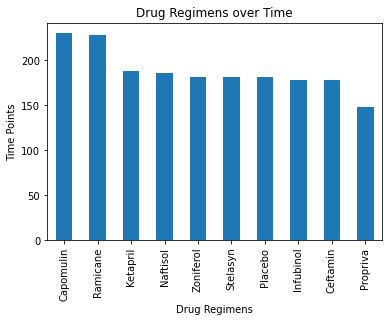

In [24]:
timepoints.plot(kind='bar')
plt.title("Drug Regimens over Time")
plt.xlabel("Drug Regimens")
plt.ylabel("Time Points")
plt.show()

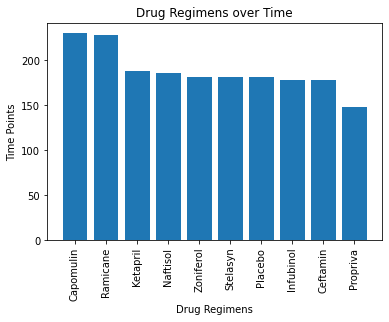

In [25]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(timepoints.index.values, timepoints.values)
plt.xticks(rotation=90)
plt.title("Drug Regimens over Time")
plt.xlabel("Drug Regimens")
plt.ylabel("Time Points")
plt.show()


In [26]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = clean_study["Sex"].value_counts()


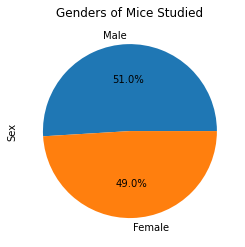

In [27]:
mice_gender.plot(kind='pie', autopct='%1.1f%%')
plt.title("Genders of Mice Studied")
plt.show()

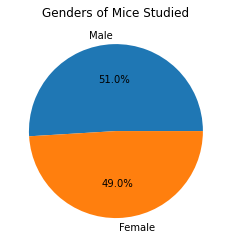

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_gender.values, labels=mice_gender.index.values, autopct='%1.1f%%')
plt.title("Genders of Mice Studied")
plt.show()

## Quartiles, Outliers and Boxplots

In [29]:
last_timepoint = clean_study.groupby("Mouse ID").max()["Timepoint"]

In [30]:
last_timepoint=last_timepoint.reset_index()

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_clean_study = pd.merge(clean_study, last_timepoint, on=["Mouse ID", "Timepoint"], how='left')

In [32]:
new_clean_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30


In [33]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimines = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_data = []
# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_regimines:
    tumor_vol = new_clean_study.loc[new_clean_study['Drug Regimen']==drug,"Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_vol)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    quantiles = tumor_vol.quantile([.25, .5, .75])
    # add subset 
    lower_q = quantiles[.25]
    upper_q = quantiles[.75]
    iqr = upper_q - lower_q
    outlier_lower = lower_q-(1.5*iqr)
    outlier_upper = upper_q+(1.5*iqr)
    outlier = tumor_vol.loc[(tumor_vol > outlier_upper) | (tumor_vol < outlier_lower)]
    # Determine outliers using upper and lower bounds
    print(f"{drug} {outlier}")

Capomulin 1639    25.472143
1836    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane 1801    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


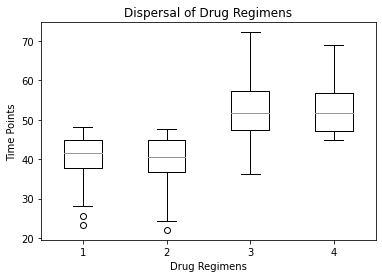

In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data)
plt.title("Dispersal of Drug Regimens")
plt.xlabel("Drug Regimens")
plt.ylabel("Time Points")
plt.show()

## Line and Scatter Plots

In [35]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



In [36]:

Capomulin_data = clean_study.loc[clean_study['Drug Regimen']=="Capomulin","Tumor Volume (mm3)"]
weight_cap = clean_study.loc[clean_study["Drug Regimen"]=="Capomulin","Weight (g)"]

 

In [37]:
Capomulin_data

0       45.000000
226     45.000000
227     45.000000
228     45.000000
229     45.000000
          ...    
1854    40.728578
1859    38.125164
1878    47.685963
1888    41.581521
1889    31.023923
Name: Tumor Volume (mm3), Length: 230, dtype: float64

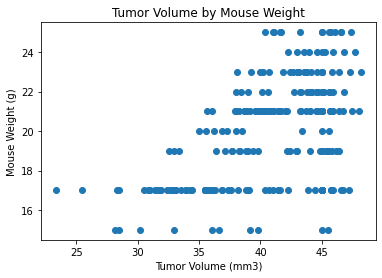

In [40]:
plt.scatter(Capomulin_data, weight_cap)
plt.title("Tumor Volume by Mouse Weight")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")
plt.show()

In [39]:
x=Capomulin_data
y=weight_cap
correlation = st.pearsonr(x,y)
print(correlation)

(0.525699555207717, 9.605446629502006e-18)


In [123]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#plt.plot(Capomulin_data, Capomulin_time)
#plt.xlabel("Tumor Volume (mm3)")
#plt.ylabel("Time")
#plt.show()

mousy = "b128"
#mousy_tumors = []
#tumor_time = []
mousy_df = clean_study.loc[clean_study["Mouse ID"]==mousy,]
    
#mousy_tumor = clean_study.loc[clean_study["Mouse ID"]==mousy, "Tumor Volume (mm3)"]
#mousy_tumors.append(mousy_tumor)
#mousy_times = clean_study.loc[clean_study["Mouse ID"]==mousy, "Timepoint"]
#tumor_time.append(mousy_times)

   

In [124]:
mousy_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
472,b128,5,45.651331,0,Capomulin,Female,9,22
679,b128,10,43.270852,0,Capomulin,Female,9,22
719,b128,15,43.784893,0,Capomulin,Female,9,22
933,b128,20,42.731552,0,Capomulin,Female,9,22
1268,b128,25,43.262145,1,Capomulin,Female,9,22
1400,b128,30,40.605335,1,Capomulin,Female,9,22
1547,b128,35,37.967644,1,Capomulin,Female,9,22
1629,b128,40,38.379726,2,Capomulin,Female,9,22
1764,b128,45,38.982878,2,Capomulin,Female,9,22


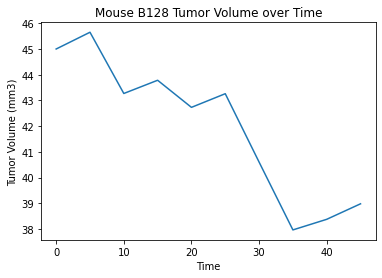

In [126]:
plt.plot(mousy_df["Timepoint"], mousy_df["Tumor Volume (mm3)"])
plt.title("Mouse B128 Tumor Volume over Time")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time")
plt.show()

## Correlation and Regression

In [44]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


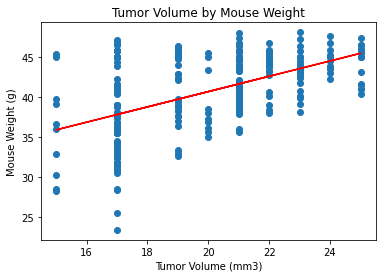

In [41]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight_cap, Capomulin_data)
regress_values = weight_cap*slope + intercept
line_eq = 'y =' + str(round(slope, 2)) + 'x+' +str(round(intercept,2))
plt.scatter(weight_cap, Capomulin_data)
plt.plot(weight_cap, regress_values, 'r-')
plt.title("Tumor Volume by Mouse Weight")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")
plt.show()